### **Iris Flower Classification**

<img width=200, height=200, src="iris.png"/>

In [1]:
# import necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load the data
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df["target_names"] = df["target"].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.target.unique()

array([0, 1, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Data Visualization and Exploration

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

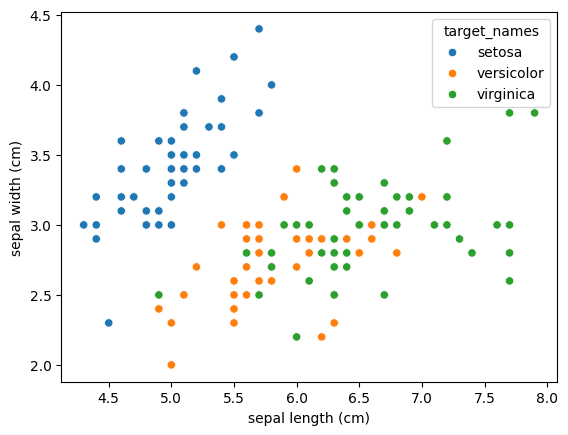

In [7]:
sns.scatterplot(df, x="sepal length (cm)", y="sepal width (cm)", hue="target_names")

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

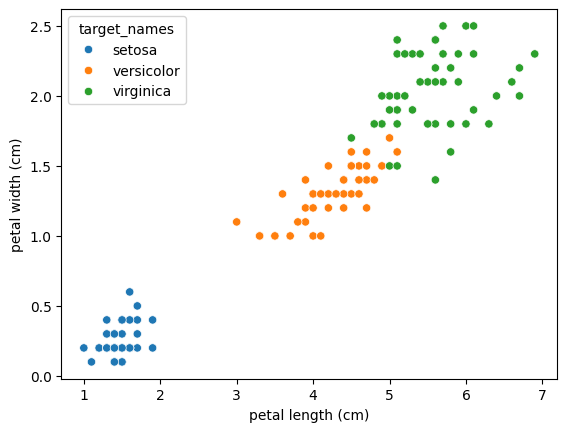

In [8]:
sns.scatterplot(df, x="petal length (cm)", y="petal width (cm)", hue="target_names")

In [9]:
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["target"]

#### Model Training

In [10]:
# Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

#### Model Evaluation

In [11]:
model.score(X_test, y_test)

0.9777777777777777

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9777777777777777

In [14]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]])

Text(0.5, 1.0, 'Confusion Matrix')

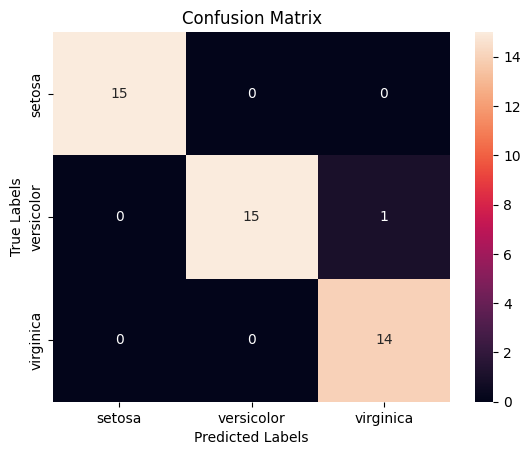

In [16]:
sns.heatmap(cm, xticklabels=iris.target_names, yticklabels=iris.target_names, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")